This notebook is designed to visualize what the ocr is doing and seeing if we can fine tune the scraper.

Note: This notebook was done in colab

Note: These are imports done from the previous cohort team for the scaper. Any imports I make will be documented and later added onto another cell

In [1]:
%%capture
!pip install spacy
!pip install bs4
!pip install geonamescache


In [2]:
from typing import List, Tuple, Union, Callable, Dict, Iterator
from collections import defaultdict
from pprint import pprint
from difflib import SequenceMatcher
from datetime import datetime
import bs4
from bs4 import BeautifulSoup, element
import geonamescache
import requests
import pandas as pd
import numpy as np
from pathlib import Path
import re
import os

import spacy
from spacy.tokens.doc import Doc
from spacy.tokens.span import Span
from spacy.tokens.token import Token
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


Because the previous team used their own google drive to upload a case I directly uploaded a file on collab and referenced it here.
You can use any of the files provided. We are just testing if 
the methods we use will have more acccuracy versus another. Just remember you will have to continually reupload the file if you are on a collab 

In [ ]:
pip install pyPDF2
pip install pdf2image
pip install pytesseract
# this has to be installed along with pytessaract to get things going
!sudo apt install tesseract-ocr

In [74]:
# imports I used during visualization/ will remove give detail to what they do 
# after more visualization is done or more complete
# 
import PyPDF2
import pytesseract
#
from pdf2image import convert_from_path, convert_from_bytes
#
from IPython.display import display, Image
#
from PIL import Image


In [47]:
'''
# I renamed the case I uploaded so it would be easier to call 
asylum_file = open("dummy_case2.pdf", 'rb')
# calling with pyPDF2 
asylum_case = PyPDF2.PdfFileReader(asylum_file)
# seeing how many pages 
# this can be commented out later since this is just here for to see if we have it working
asylum_case_page = asylum_case.numPages
# 
asylum_case_pages = asylum_case.getPage(asylum_case_page-1)
#
text = asylum_case_pages.extractText()
print(text)
# notes as of 3/18/2021 this method returns a blank using pyPDF2
'''


The method of converting file to text wasn't displaying what I was expecting. The next method I have in mind is converting the image to text.
Note: This method is only displaying 1 page at a time 

<class 'list'>


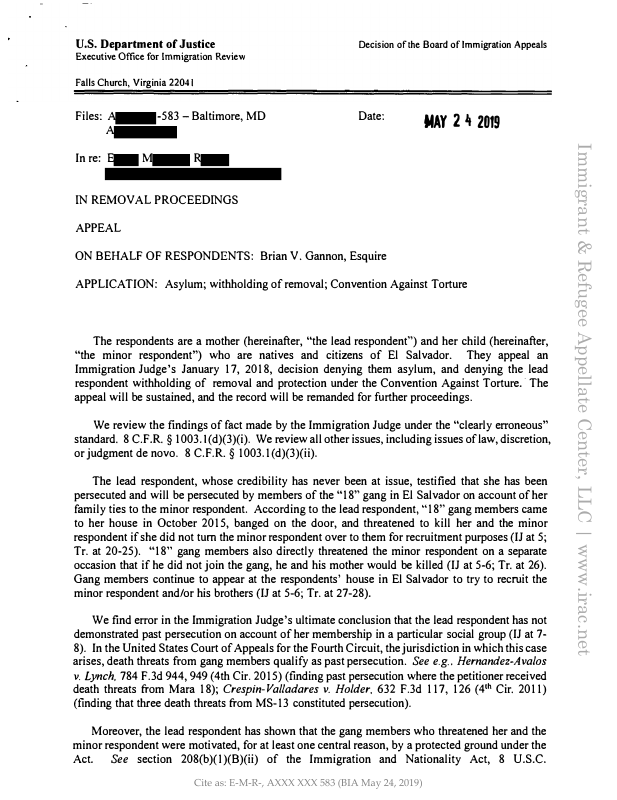

None


In [101]:
# this converts the pdf to an image and we can display it

images = convert_from_bytes(open('dummy_case2.pdf', 'rb').read(), size=800)
# because images is a list(the pages that were converted) we have to split
# the list into single variables. 
# 
print(type(images))
print(display(images[1]))
text = pytesseract.image_to_string(images[1])

In [102]:
# check out the accuracy with the text and file  
print(text)

U.S. Department of Justice Decision of the Board af immigration Appeals
Executive Office for Immigration Review

 

Files: AlM-583 ~ Baltimore, MD Date:
—_ ‘MAY 2.4 2019

IN REMOVAL PROCEEDINGS.
APPEAL
(ON BEHALF OF RESPONDENTS: Brian V. Gannon, Esquire

APPLICATION: Asylum; withholding of removal; Convention Against Torture

 

‘The respondents are a mother (hereinafter, “the lead respondent”) and her child (hereinafter,
“the minor respondent") who are natives and citizens of El Salvador. They appeal an
‘Immigration Judge’s January 17, 2018, decision denying them asylum, and denying the lead
respondent withholding of removal and protection under the Convention Against Torture. The
appeal will be sustained, and the record will be remanded for further proceedings.

We review the findings of fact made by the Immigration Judge under the “clearly erroneous”
standard. 8 C.F.R. § 1003.1(4)(3)(). We review all other issues, including issues of law, discretion,
‘or judgment de novo. 8 C.F.R. §

If the accuracy is within the range of your liking. Some of the things to consider before implementation

* This method turns the pdf to an image

* To pull out the images to read, we have to pull indiviual pages out

* So an idea using this method would be splitting the list up and giving them page number names and then pulling the text out



Moving on to test the scaper with 'text'